In [5]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df1 = pd.read_csv('tweet_20170101_20170201_en.csv')
df1['month'] = 1
df2 = pd.read_csv('tweet_20170201_20170301_en.csv')
df2['month'] = 2
df3 = pd.read_csv('tweet_20170301_20170401_en.csv')
df3['month'] = 3
df4= pd.read_csv('tweet_20170401_20170501_en.csv')
df4['month'] = 4
df5 = pd.read_csv('tweet_20170501_20170601_en.csv')
df5['month'] = 5
df6 = pd.read_csv('tweet_20170601_20170701_en.csv')
df6['month'] = 6
df7 = pd.read_csv('tweet_20170701_20170720_en.csv')
df7['month'] = 7

bdf = df1.append([df2, df3, df4, df5, df6, df7])

In [3]:
bdf.reset_index(drop=True)
sbdf = bdf[['month', 'impressions','engagements','retweets','likes', 'follows', 'media views']]
gbdf = sbdf.groupby(by='month')
gbdf.agg(['count', 'min', 'max', 'mean'])
#bdf[['Tweet text', 'impressions', 'retweets']][bdf.retweets>10]

impressions                               engagements                \
            count     min      max         mean       count   min     max   
month                                                                       
1              10  1802.0   3549.0  2398.000000          10  46.0   171.0   
2              15  2108.0  10087.0  3339.000000          15  36.0   241.0   
3              22   105.0   2128.0  1501.454545          22   3.0   207.0   
4              13  1743.0   2692.0  2206.000000          13  43.0   230.0   
5              39   259.0  13409.0  2121.871795          39   0.0  1323.0   
6              13   943.0   2766.0  1720.230769          13  44.0   155.0   
7              10   847.0   1974.0  1474.500000          10  19.0   168.0   

                  retweets         ...      likes            follows          \
             mean    count  min    ...        max       mean   count min max   
month                              ...                                         
1      109.800000       10  5.0    ...       67.0  28.800000      10   0   0   
2      101.600000       15  3.0    ...       56.0  24.066667      15   0   0   
3       75.090909       22  0.0    ...       41.0  19.045455      22   0   1   
4      112.076923       13  6.0    ...       68.0  31.076923      13   0   1   
5      140.153846       39  0.0    ...      239.0  27.128205      39   0   1   
6       85.230769       13  3.0    ...       36.0  25.846154      13   0   0   
7       77.500000       10  0.0    ...       34.0  26.300000      10   0   0   

                media views                      
           mean       count min  max       mean  
month                                            
1      0.000000          10   0   89  39.900000  
2      0.000000          15   0  376  57.466667  
3      0.045455          22   0   91  24.909091  
4      0.076923          13   3  110  43.153846  
5      0.051282          39   0  660  54.948718  
6      0.000000          13   2  108  23.538462  
7      0.000000          10   0  265  62.500000  

[7 rows x 24 columns]

## Plot a feature

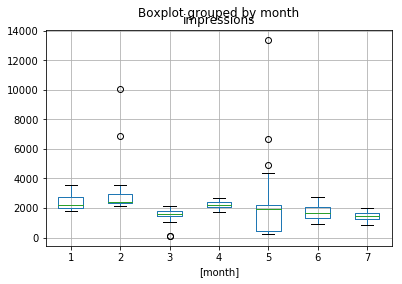

In [13]:
# Choose the feature
field_list = ['impressions','month']
tmp = bdf[field_list]
#tmp.plot.scatter(x='month', y='likes')
tmp.boxplot(by='month')


## Now lets see what is going on with tags # and mentions @

In [41]:
import string
import operator

tag_dict = {}
mention_dict = {}
translator = str.maketrans("","", string.punctuation)
for i in bdf.index:
    tweet_text = bdf.ix[i]['Tweet text']
    tweet = str(tweet_text).lower()
    tweet_tokenized = tweet.split()
    
    for word in tweet_tokenized:
        if word[0:1] == '#' and len(word) > 1 :
            key = word.translate(translator)
            if key in tag_dict:
                tag_dict[key] += 1
            else:
                tag_dict[key] = 1
                
        if word[0:1] == '@' and len(word) > 1 :
            key = word.translate(translator)
            if key in mention_dict:
                mention_dict[key] += 1
            else:
                mention_dict[key] = 1
                
sorted_tag_dict = sorted(tag_dict.items(), key=operator.itemgetter(1))
sorted_mention_dict = sorted(mention_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_mention_dict

[('drachmolagnos', 12),
 ('', 8),
 ('oecd', 6),
 ('corinacr', 6),
 ('e', 6),
 ('cori', 6),
 ('pkmakedonias', 6),
 ('kmitsotakis', 6),
 ('cern', 6),
 ('antoniaantant8', 3),
 ('alpharadio965', 3),
 ('lprasinos', 3),
 ('vasilismosxop', 2),
 ('aristotelis2nd', 2),
 ('fragelico1', 2),
 ('chrisdeme', 2),
 ('elenasagiadinou', 2),
 ('taniaele', 2),
 ('svirkou1', 2),
 ('atsipras', 1),
 ('tzervoudakis', 1),
 ('kyriakosdiaman1', 1),
 ('adonisgeorgiadi', 1),
 ('gmourout', 1)]

## And what about time analysis

In [29]:
gmt_offset = 2

# Create datetime column
bdf['ts'] = pd.to_datetime(bdf['time'])
bdf['ts'] = bdf.ts + pd.to_timedelta(gmt_offset, unit='h')

# Add hour of day and day of week columns
bdf['hod_col'] = [t.hour for t in bdf.ts]
bdf['dow_col'] = [t.dayofweek for t in bdf.ts]

hod_dict = {}
hod_count = {}
dow_dict = {}
dow_count = {}
weekday_dict = {0:'Δευ', 1:'Τρι', 2:'Τετ', 3:'Πεμ', 4:'Παρ', 5:'Σαβ', 6:'Κυρ'}

# Process tweets, collect stats
for index, row in bdf.iterrows():
    hod = row['hod']
    dow = row['dow']
    imp = row['impressions']

    if hod in hod_dict:
        hod_dict[hod] += int(imp)
        hod_count[hod] += 1
    else:
        hod_dict[hod] = int(imp)
        hod_count[hod] = 1

    if dow in dow_dict:
        dow_dict[dow] += int(imp)
        dow_count[dow] += 1
    else:
        dow_dict[dow] = int(imp)
        dow_count[dow] = 1

print('Average impressions per tweet by hour tweeted:')
print('----------------------------------------------')
for hod in hod_dict:
    print(hod, '-', hod+1, ':', round(hod_dict[hod]/hod_count[hod]), '=>', hod_count[hod], ' tweets')

print('\nAverage impressions per tweet by day of week tweeted:')
print('-----------------------------------------------------')
for dow in dow_dict:
    print(weekday_dict[dow], ':', round(dow_dict[dow]/dow_count[dow]), '=>', dow_count[dow], ' tweets')

Average impressions per tweet by hour tweeted:
----------------------------------------------
7 - 8 : 1994 => 1  tweets
8 - 9 : 2766 => 1  tweets
10 - 11 : 1813 => 6  tweets
11 - 12 : 1357 => 4  tweets
12 - 13 : 2858 => 10  tweets
13 - 14 : 2061 => 9  tweets
14 - 15 : 2469 => 12  tweets
15 - 16 : 2262 => 16  tweets
16 - 17 : 1930 => 5  tweets
17 - 18 : 1963 => 5  tweets
18 - 19 : 3890 => 2  tweets
19 - 20 : 3190 => 11  tweets
20 - 21 : 2060 => 7  tweets
21 - 22 : 1875 => 5  tweets
22 - 23 : 852 => 15  tweets
23 - 24 : 2652 => 3  tweets

Average impressions per tweet by day of week tweeted:
-----------------------------------------------------
Δευ : 1976 => 21  tweets
Τρι : 1675 => 13  tweets
Τετ : 1917 => 25  tweets
Πεμ : 1814 => 17  tweets
Παρ : 2808 => 17  tweets
Σαβ : 2112 => 10  tweets
Κυρ : 3333 => 9  tweets


In [50]:
#bdf.columns
bdf[['month', 'Tweet text', 'likes' ]].groupby('month').max()

,Tweet text,likes
month,,
1,Το Σύμφωνο Συνεργασίας με το @CERN πρώτο βήμα ...,67.0
2,Χρόνια πολλά από το καρναβάλι της Νάουσας!!! #...,56.0
3,Χρόνια πολλά στην Ελλάδα μας! Συγχαρητήρια στα...,41.0
4,Χριστός Ανέστη! Χρόνια πολλά με υγεία!! https:...,68.0
5,Συνάντηση στην Περιφέρεια με τονΒ.Υφυπουργό Εξ...,239.0
6,Στα αποκαλυπτήρια της πλακέτας για το Μουσείο ...,36.0


In [51]:
bdf.columns

Index(['Tweet id', 'Tweet permalink', 'Tweet text', 'time', 'impressions',
       'engagements', 'engagement rate', 'retweets', 'replies', 'likes',
       'user profile clicks', 'url clicks', 'hashtag clicks', 'detail expands',
       'permalink clicks', 'app opens', 'app installs', 'follows',
       'email tweet', 'dial phone', 'media views', 'media engagements',
       'promoted impressions', 'promoted engagements',
       'promoted engagement rate', 'promoted retweets', 'promoted replies',
       'promoted likes', 'promoted user profile clicks', 'promoted url clicks',
       'promoted hashtag clicks', 'promoted detail expands',
       'promoted permalink clicks', 'promoted app opens',
       'promoted app installs', 'promoted follows', 'promoted email tweet',
       'promoted dial phone', 'promoted media views',
       'promoted media engagements', 'month', 'ts', 'hod', 'dow', 'hod_col',
       'dow_col'],
      dtype='object')

## Explore the correlations

In [60]:
import matplotlib.pyplot as plt
bdf_corr = bdf[['likes', 'engagements', 'impressions', 'retweets']].corr(method='spearman') 
bdf_corr.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

Populating the interactive namespace from numpy and matplotlib


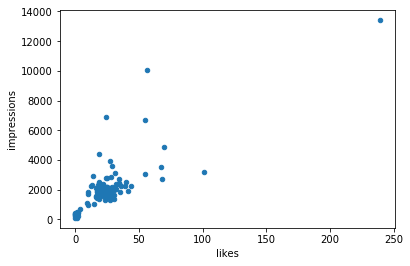

In [65]:
bdf.plot(kind='scatter', x='likes', y='impressions')